In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Strong and Weak Scaling
=============
Strong Scaling & Amdahl's Law
---------------------------------
*How much faster can we solve the same problem by putting in more ressources?*

Execution time
$$ t_p = \frac{f \cdot t_1}{p} + (1-f)t_1 $$
Speed up
$$ S_p = \frac{t_1}{t_p} = \frac{p}{f+(1-f)p} \leq \frac{1}{1-f} $$
Parallel efficiency, between 0 and 1. 
$$ E_p = \frac{S_p}{p} = \frac{t_1}{t_p \cdot p} = \frac{1}{f+(1-f)p} \leq \frac{1}{(1-f)p} $$

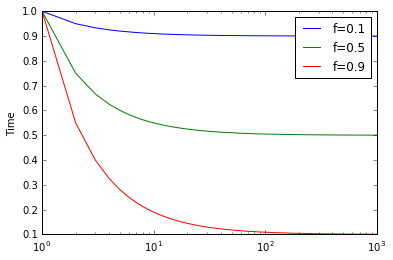

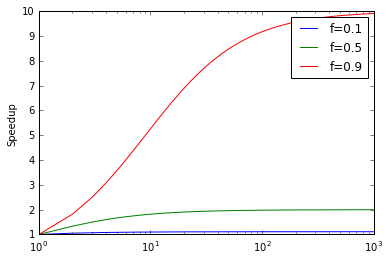

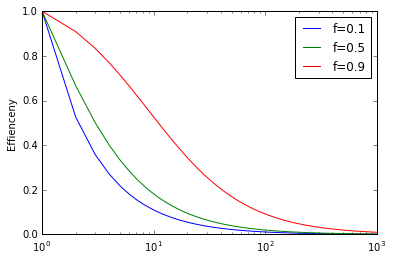

In [2]:
def parallel_problem(f, p):
    """ Amdahl: Time of a parallel problem with parallel fraction f and number of processors p """
    t1 = 1
    parallel = f*t1 / p
    sequential = (1-f) * t1
    return parallel + sequential

def speedup(f, p):
    return parallel_problem(f, 1) / parallel_problem(f, p)

def efficiency(f, p):
    return speedup(f, p) / p

processors = np.arange(1, 1000)

plt.semilogx(processors, parallel_problem(0.1, processors), label="f=0.1")
plt.semilogx(processors, parallel_problem(0.5, processors), label="f=0.5")
plt.semilogx(processors, parallel_problem(0.9, processors), label="f=0.9")
plt.ylabel("Time")
plt.legend()
plt.show()

plt.semilogx(processors, speedup(0.1, processors), label="f=0.1")
plt.semilogx(processors, speedup(0.5, processors), label="f=0.5")
plt.semilogx(processors, speedup(0.9, processors), label="f=0.9")
plt.ylabel("Speedup")
plt.legend()
plt.show()

plt.semilogx(processors, efficiency(0.1, processors), label="f=0.1")
plt.semilogx(processors, efficiency(0.5, processors), label="f=0.5")
plt.semilogx(processors, efficiency(0.9, processors), label="f=0.9")
plt.ylabel("Effienceny")
plt.legend()
plt.show()

Weak Scaling & Gustafson's Law
----------------------------------
*How much larger problems can we solve in the compute time with more ressources?*

The problem sizes grows with the number of processors.

Execution time
$$ t_p = (1-f) + f \cdot p $$
Speed up
$$ S_{pf} = \frac{t_1}{t_p} = \frac{1-f+f p}{1} = p + (1-p)(1-f) $$
Parallel efficiency, between 0 and 1. 
$$ E_p = \frac{S_{pf}}{p} = \frac{1-f}{p} + f $$

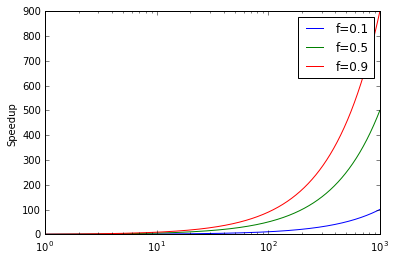

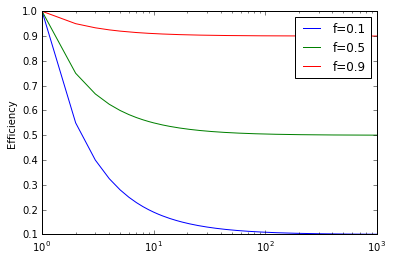

In [3]:
speedup = lambda f, p: p + (1-p)*(1-f)
efficiency = lambda f, p: (1-f)/p + f

plt.semilogx(processors, speedup(0.1, processors), label="f=0.1")
plt.semilogx(processors, speedup(0.5, processors), label="f=0.5")
plt.semilogx(processors, speedup(0.9, processors), label="f=0.9")
plt.ylabel("Speedup")
plt.legend()
plt.show()

plt.semilogx(processors, efficiency(0.1, processors), label="f=0.1")
plt.semilogx(processors, efficiency(0.5, processors), label="f=0.5")
plt.semilogx(processors, efficiency(0.9, processors), label="f=0.9")
plt.ylabel("Efficiency")
plt.legend()
plt.show()